<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Clust_Metric_Kohonen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# сначала нужно установить библиотеку если она не была установлена ранее
!pip install som-pbc;
!pip install --upgrade som-pbc;

  Created wheel for som-pbc: filename=som_pbc-1.0.2-py3-none-any.whl size=9007 sha256=3ef65e9534c517f0ae36904bfc64dd1ff35cdc0eb832e6af0196adbd6eefb28b
  Stored in directory: /root/.cache/pip/wheels/a0/e4/10/2b55b54f1022c690216c0090044c8b385cebe8feb2413fbb10
Successfully built som-pbc


In [ ]:
# импорт
import numpy as np
from som import SOM
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [ ]:
# создание данных
# для SOM нужно не мене 4 фичей, иначе не считает
iris = datasets.load_iris()
data = iris.data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

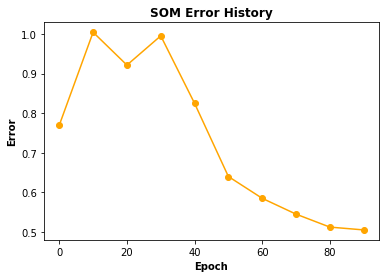

In [ ]:
# модель и обучение
som = SOM(10, 10)        # сетка 5 на 5, можно больше - будет лучше видно
som.fit(data_std,        
        100,             # кол-во итераций 
        save_e=True,     # сохранить историю ошибок обучения
        interval=10,     # сохранять историю через каждые n итераций
        verbose=0)       # выводить ли значения
som.plot_error_history() # отрисовка истории ошибок

In [ ]:
# создание дамми целей
targets = np.array(data_std.shape[0] * [0] + data_std.shape[0] * [1])

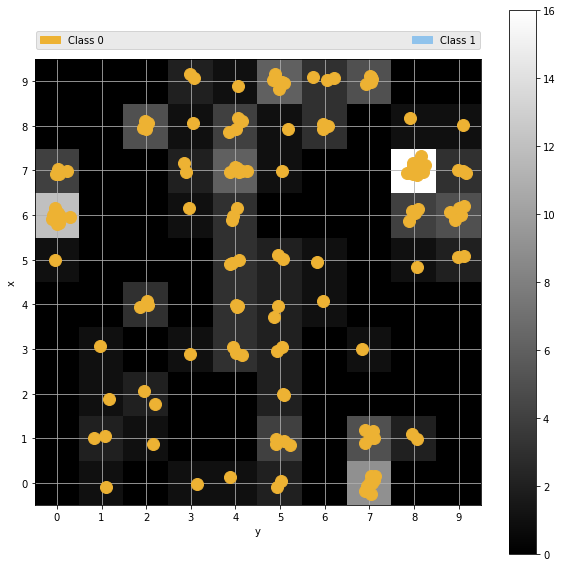

In [ ]:
# now visualize the learned representation with the class labels
som.plot_point_map(data_std, targets, ['Class 0', 'Class 1'])

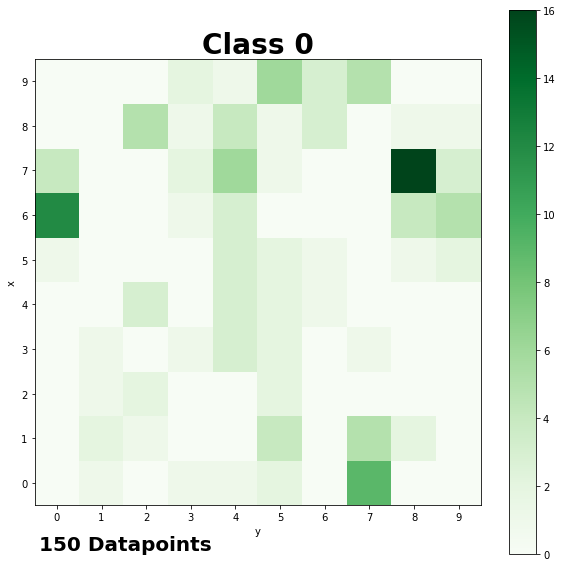

In [ ]:
som.plot_class_density(data_std, targets, t=0, name='Class 0', colormap='Greens')

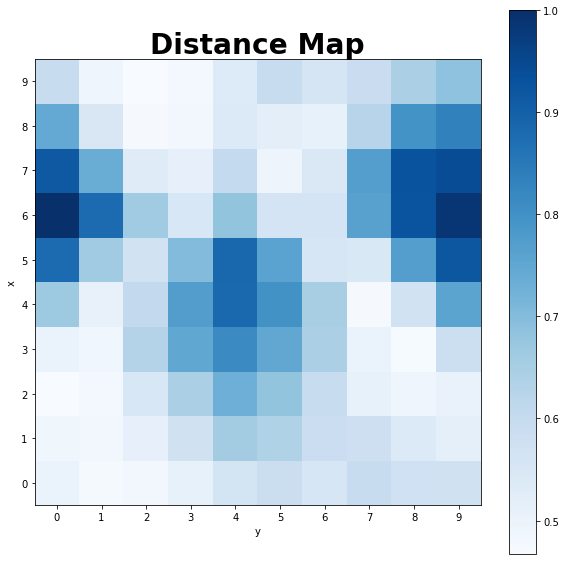

In [ ]:
som.plot_distance_map(colormap='Blues')  # plot the distance map after training